In [3]:
import numpy as np
import matplotlib.pyplot as plt


Q1

In [4]:
#Q1(sampling distribution)  for sample size 10
mean=100
std_deviation=15
num_trials=1000
means=[]
stds=[]

In [5]:
def perform_sampling(size):
    for i in range(num_trials):
        sample=np.random.normal(mean,std_deviation,size)
        sample_mean=np.mean(sample)
        sample_std=np.std(sample,ddof=1)
        means.append(sample_mean)
        stds.append(sample_std)
          

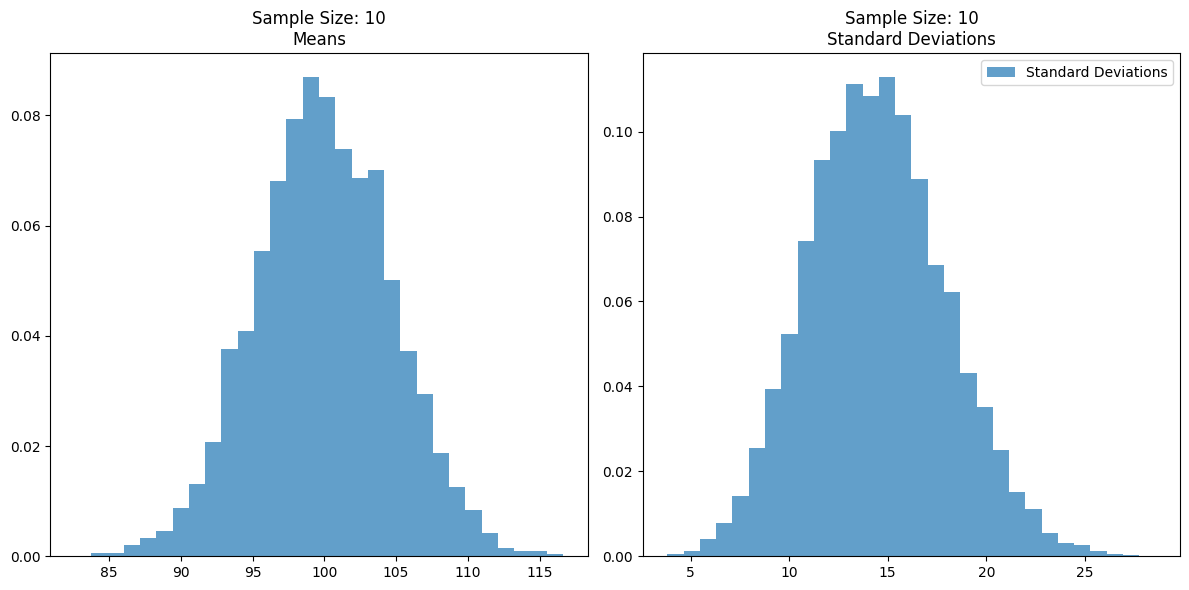

In [12]:
size=10
perform_sampling(size)
fig, ax = plt.subplots(1,2,figsize=(12, 6))

# Plot means histogram
n_means, bins_means, _ = ax[0].hist(means, bins=30, density=True, alpha=0.7, label='Means')
ax[0].set_title(f"Sample Size: {size}\nMeans")

# Plot standard deviations histogram
n_stds, bins_stds, _ = ax[1].hist(stds, bins=30, density=True, alpha=0.7, label='Standard Deviations')
ax[1].set_title(f"Sample Size: {size}\nStandard Deviations")

plt.legend()
plt.tight_layout()
plt.show()

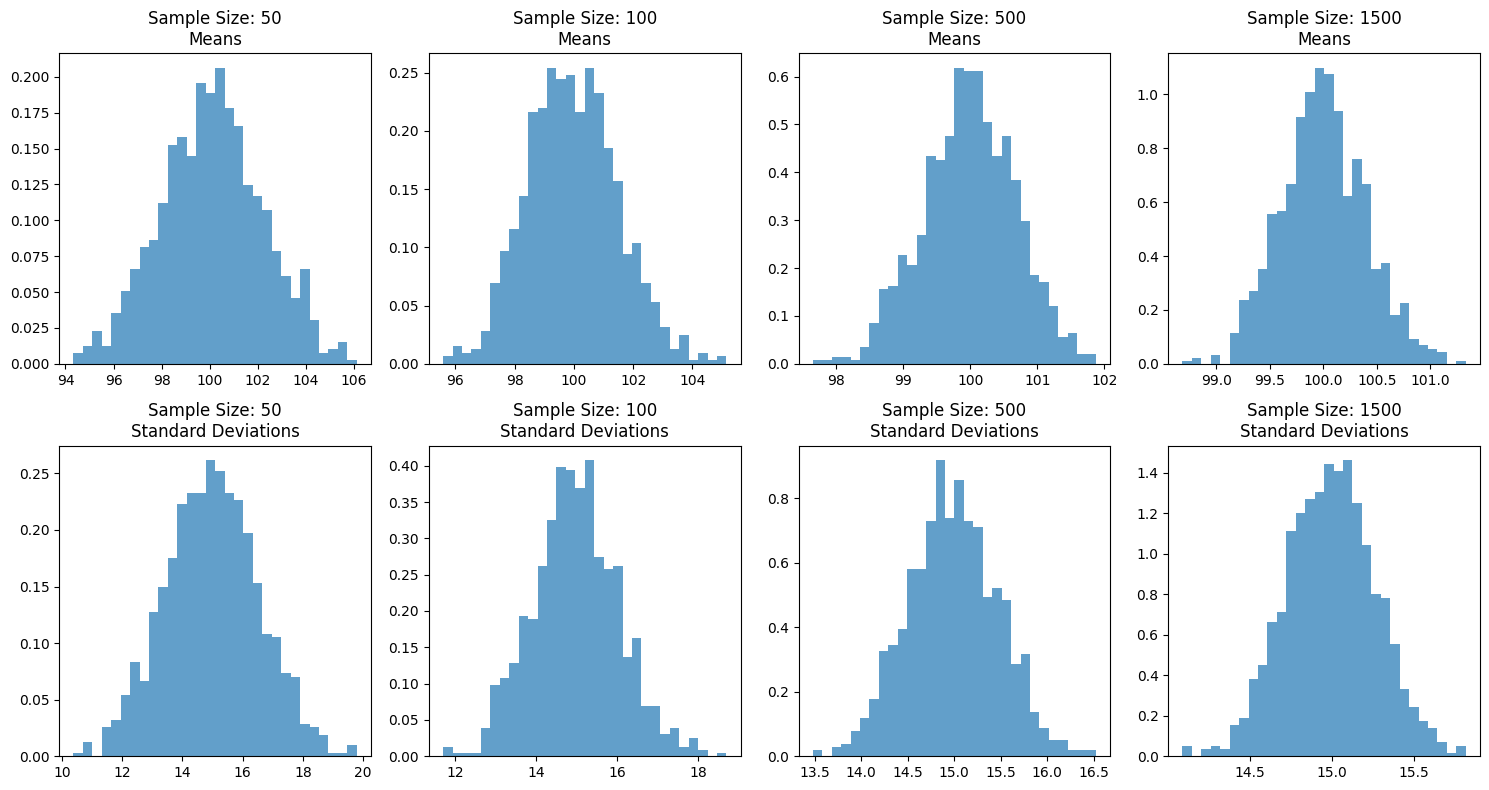

In [16]:


# Q1-d for different sample sizes [50,100,500,1500]
population_mean = 100
population_std = 15
sample_sizes = [ 50, 100, 500, 1500]
num_trials = 1000

# Initialize arrays to store means and standard deviations for each sample size
all_means = {}
all_stds = {}

# Function to perform sampling and calculate means and standard deviations

# modifying the above defined function for different sample sizes
def perform_sampling(sample_size):
    means = []
    stds = []
    for _ in range(num_trials):
        sample = np.random.normal(population_mean, population_std, sample_size)
        sample_mean = np.mean(sample)
        sample_std = np.std(sample, ddof=1) 
        means.append(sample_mean)
        stds.append(sample_std)
    all_means[sample_size] = means
    all_stds[sample_size] = stds


for sample_size in sample_sizes:
    perform_sampling(sample_size)


plt.figure(figsize=(15, 8))

for i, sample_size in enumerate(sample_sizes):
    plt.subplot(2, len(sample_sizes), i + 1)
    plt.hist(all_means[sample_size], bins=30, density=True, alpha=0.7)
    plt.title(f"Sample Size: {sample_size}\nMeans")

    plt.subplot(2, len(sample_sizes), len(sample_sizes) + i + 1)
    plt.hist(all_stds[sample_size], bins=30, density=True, alpha=0.7)
    plt.title(f"Sample Size: {sample_size}\nStandard Deviations")

plt.tight_layout()
plt.show()


#Observation:
As the sample size increases, the distribution of sample means becomes more normal .

While the above plots  provides insights into the behavior of sample means, it doesn't make specific predictions about the distribution of sample standard deviations. 

The observed patterns are consistent with the fundamental principles of the Central Limit Theorem.


Q2

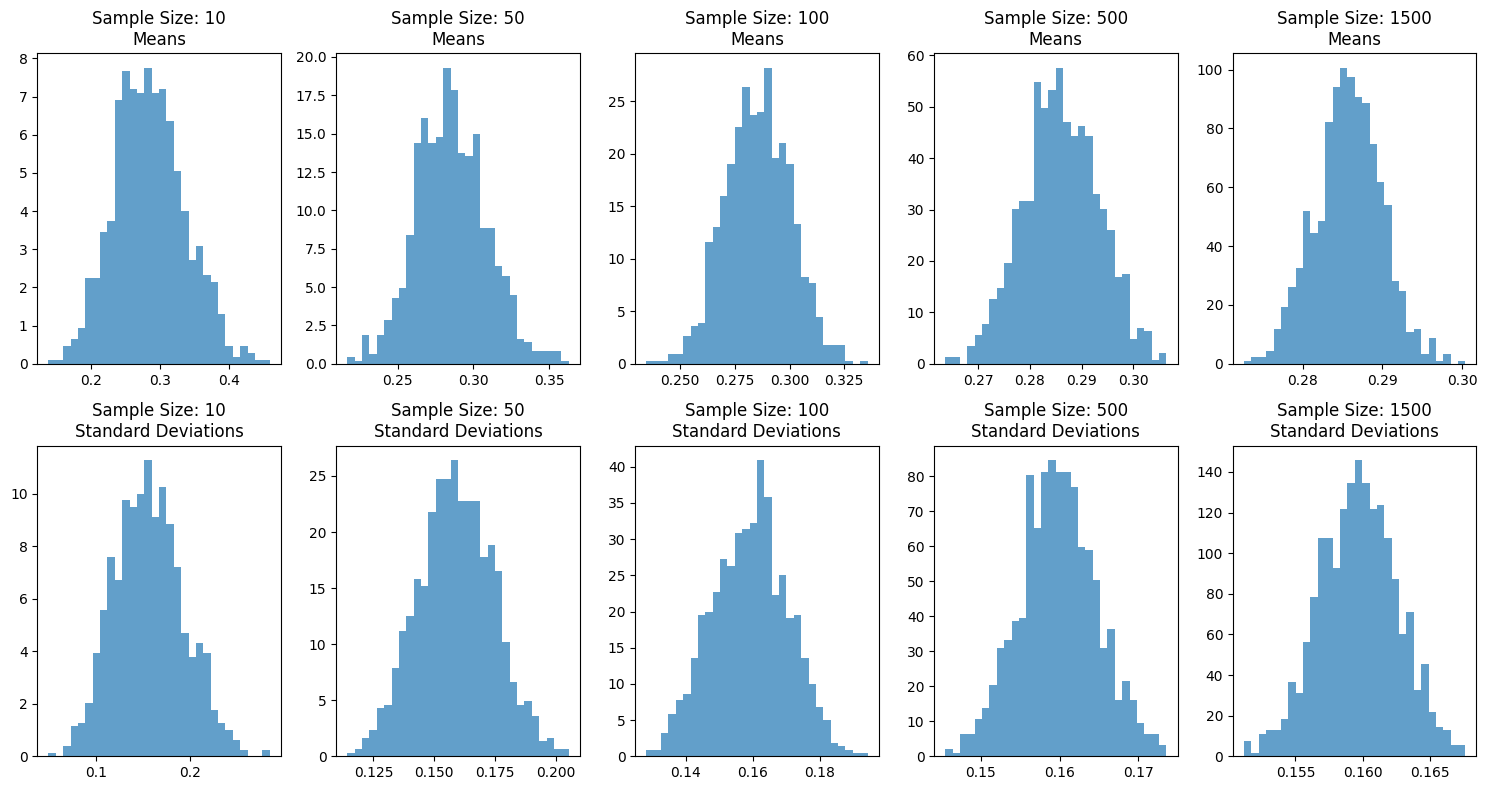

In [21]:

# Q2 for different sample sizes [50, 100, 500, 1500]
# changing the normal distribution to the Beta distribution wiht parameter alpha=2 and beta=5
sample_sizes = [10,50, 100, 500, 1500]
num_trials = 1000

# Parameters 
alpha = 2  
beta = 5   

# Initialize arrays to store means and standard deviations for each sample size
all_means = {}
all_stds = {}

# Function to perform sampling and calculate means and standard deviations
def perform_sampling(sample_size):
    means = []
    stds = []
    for _ in range(num_trials):
        sample = np.random.beta(alpha, beta, size=sample_size)
        sample_mean = np.mean(sample)
        sample_std = np.std(sample, ddof=1)  
        means.append(sample_mean)
        stds.append(sample_std)
    all_means[sample_size] = means
    all_stds[sample_size] = stds


for sample_size in sample_sizes:
    perform_sampling(sample_size)


plt.figure(figsize=(15, 8))

for i, sample_size in enumerate(sample_sizes):
    plt.subplot(2, len(sample_sizes), i + 1)
    plt.hist(all_means[sample_size], bins=30, density=True, alpha=0.7)
    plt.title(f"Sample Size: {sample_size}\nMeans")

    plt.subplot(2, len(sample_sizes), len(sample_sizes) + i + 1)
    plt.hist(all_stds[sample_size], bins=30, density=True, alpha=0.7)
    plt.title(f"Sample Size: {sample_size}\nStandard Deviations")

plt.tight_layout()
plt.show()


#Observation:
For the Beta ditribution as the no of sample increasing the the sampling distribution means is resembling more with normal distribution.

And hence larger sample size is needed now with the beta distribution to estimate the population mean accurately.


#Q3

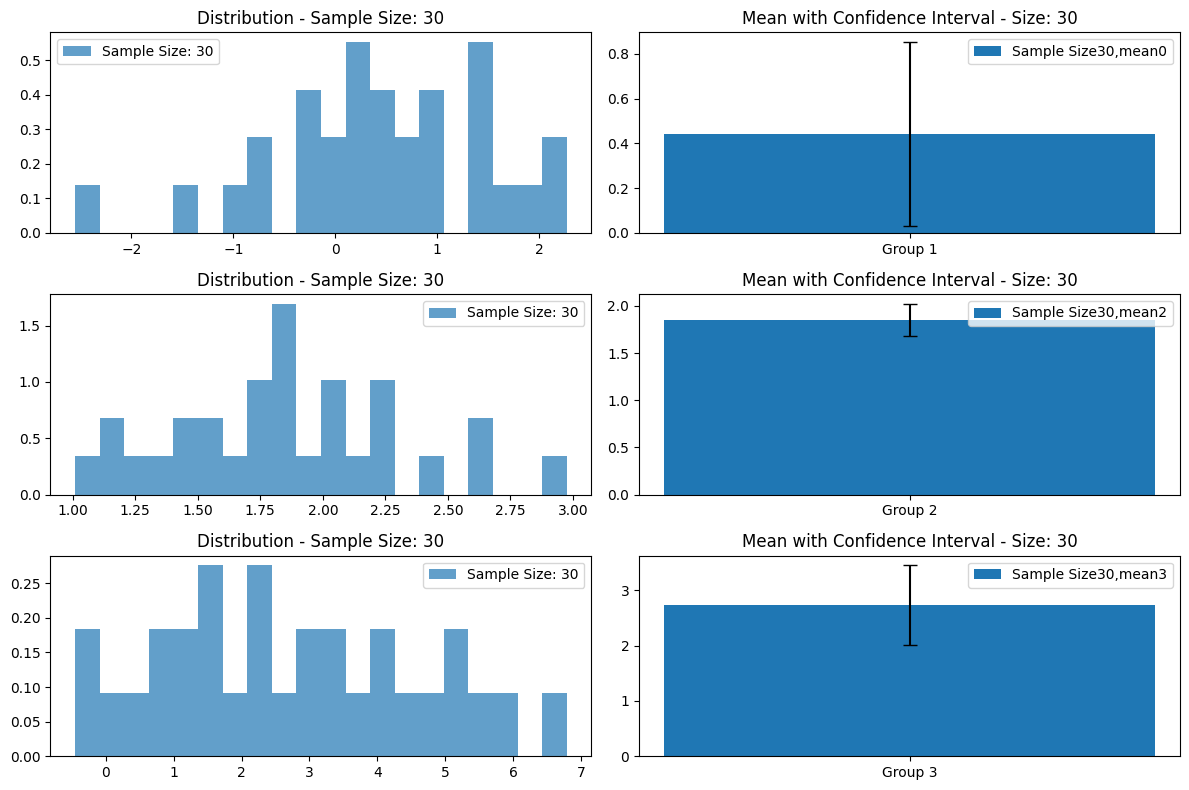

In [36]:

import scipy.stats as stats
np.random.seed(0)
# Define parameters for the normal distributions
means = [0, 2, 3]
std_devs = [1, 0.5, 2]
sample_sizes = [30, 30, 30]
confidence_level = 0.95

# Initialize arrays to store means and distributions for each group
all_samples = []

# a. Sample from normal distributions
for mean, std_dev in zip(means, std_devs):
    samples = np.random.normal(mean, std_dev, 30)
    all_samples.append(samples)

# b. Plot means and distributions with error bars
fig, axes = plt.subplots(nrows=len(sample_sizes), ncols=2, figsize=(12, 8))

for i, size in enumerate(sample_sizes):
    # Plot distributions
    axes[i, 0].hist(all_samples[i], bins=20, density=True, alpha=0.7, label=f'Sample Size: {size}')
    axes[i, 0].set_title(f'Distribution - Sample Size: {size}')
    axes[i, 0].legend()

    # Plot means with error bars
    mean_value = np.mean(all_samples[i])
    std_err = stats.sem(all_samples[i])
    conf_int = stats.t.interval(confidence_level, len(all_samples[i]) - 1, loc=mean_value, scale=std_err)

    axes[i, 1].bar([f"Group {i + 1}"], [mean_value], yerr=[[mean_value - conf_int[0]]], capsize=5, label=f'Sample Size{size},mean{means[i]}')
    axes[i, 1].set_title(f'Mean with Confidence Interval - Size: {size}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

#

# observation:
if the sample size is same for all(30) , confidence interval increase for the distribution N(0,1) , N(2,0.5), N(3,2) 

Q3

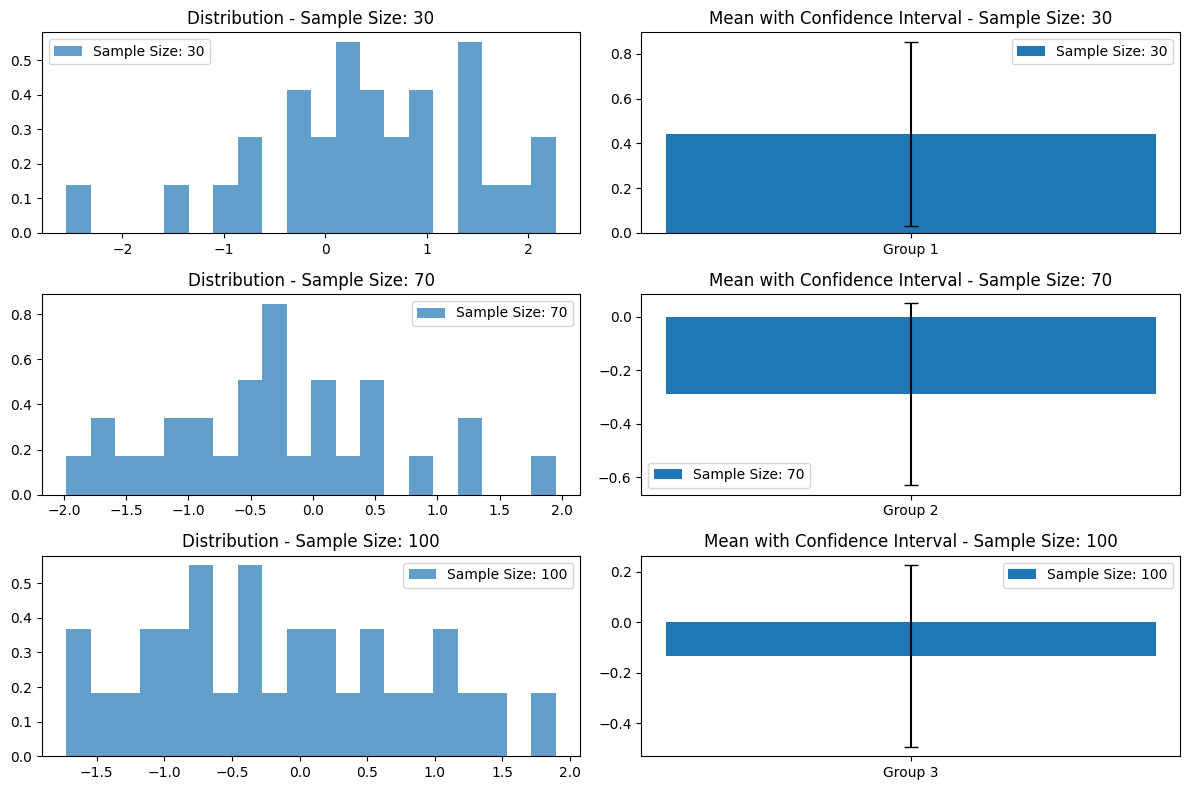

In [31]:


#Q3
np.random.seed(0)

import scipy.stats as stats

# Define parameters for the normal distributions
means = [0, 0, 0]
std_devs = [1, 1, 1]
sample_sizes = [30, 70,100]
confidence_level = 0.95

# Initialize arrays to store means and distributions for each group
all_samples = []

# a. Sample from normal distributions
for mean, std_dev in zip(means, std_devs):
    samples = np.random.normal(mean, std_dev, 30)
    all_samples.append(samples)

# b. Plot means and distributions with error bars
fig, axes = plt.subplots(nrows=len(sample_sizes), ncols=2, figsize=(12, 8))

for i, size in enumerate(sample_sizes):
    # Plot distributions
    axes[i, 0].hist(all_samples[i], bins=20, density=True, alpha=0.7, label=f'Sample Size: {size}')
    axes[i, 0].set_title(f'Distribution - Sample Size: {size}')
    axes[i, 0].legend()

    # Plot means with error bars
    mean_value = np.mean(all_samples[i])
    std_err = stats.sem(all_samples[i])
    conf_int = stats.t.interval(confidence_level, len(all_samples[i]) - 1, loc=mean_value, scale=std_err)

    axes[i, 1].bar([f"Group {i + 1}"], [mean_value], yerr=[[mean_value - conf_int[0]]], capsize=5, label=f'Sample Size: {size}')
    axes[i, 1].set_title(f'Mean with Confidence Interval - Sample Size: {size}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


 #The confidence interval tends to decrease as the number of sampled points increases. Larger sample sizes lead to more precise estimates of the population mean.